# CEEL82B Expt 1: Study of Linear Regression

Importing all necessary libraries..

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import sklearn.metrics as metrics
import missingno as mn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import norm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_curve
%matplotlib inline

## 1A: Simple linear regression and Multiclass linear regression

General Steps:
1. Load the dataset (Use pandas )
2. Data Preprocessing (Handling NA values)
3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib 
4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)
5. Build the model (use scikit learn)
6. Summarize the model. 
7. Prediction
8. Evaluate the model 
9. Tuning the model

In [72]:
data = pd.read_csv('auto-mpg.csv')

In [73]:
data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


We can see that the dataset has the following columns (with their type):

- **mpg**: continuous
- **cylinders**: multi-valued discrete
- **displacement**: continuous
- **horsepower**: string, continuous
- **weight**: continuous
- **acceleration**: continuous
- **model year**: multi-valued discrete
- **origin**: multi-valued discrete
- **car name**: string (unique for each instance)

In [75]:
data.shape

(398, 9)

In [76]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [77]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

* Horsepower an object and not a float, converting the column using astype()

In [78]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [79]:
data = data[data.horsepower != '?'] # keep non ? data only

In [80]:
print('?' in data.horsepower)

False


In [81]:
data['horsepower']=data['horsepower'].astype(float) # convert to float

In [82]:
data.shape

(392, 9)

In [83]:
data.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [84]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

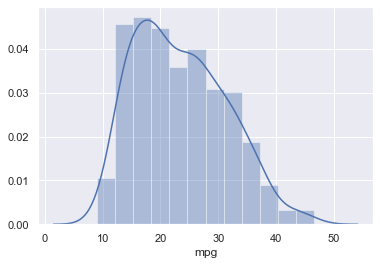

In [85]:
sns.distplot(data['mpg'])

In [86]:
print(f"Skewness: {data['mpg'].skew():.4f}")
print(f"Kurtosis: {data['mpg'].kurt():.4f}")

Skewness: 0.4571
Kurtosis: -0.5160


* We have positively skewed mpg data, i.e mean > median > mode
* We have a very small kurtosis which signifies that we have less/no outliers

In [87]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [88]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name Country_code  
0          70       1  chevrolet chevelle malibu          USA  
1          70       1          buick skylark 320          USA  
2          70       1         plymouth satellite          USA  
3          70       1              amc rebel sst          USA  
4          70       1                ford torino          USA

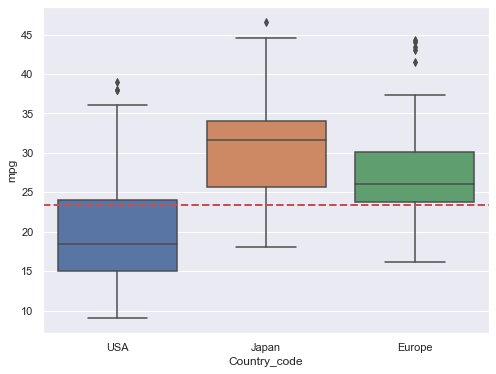

In [89]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Country_code', y="mpg", data=data)
plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)
plt.show()

The red line marks the  average of the set. From the above plot we can observe:

 - Majority of the cars from USA (almost 75%) have MPG below global average.
 - Majority of the cars from Japan and Europe have MPG above global average.

### Year wise distribution of MPG

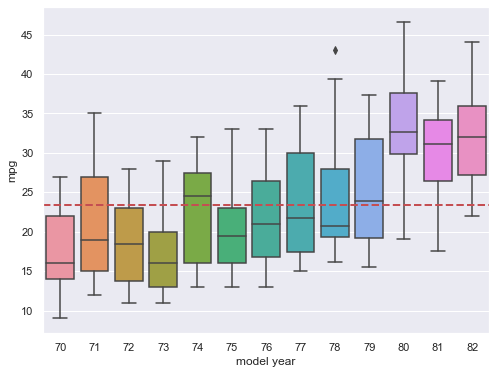

In [90]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='model year', y="mpg", data=data)
plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

The latest line of cars have significantly high mpg starting 1980s, in comparison to all the cars in 70s decade

### MPG distribution for cylinders

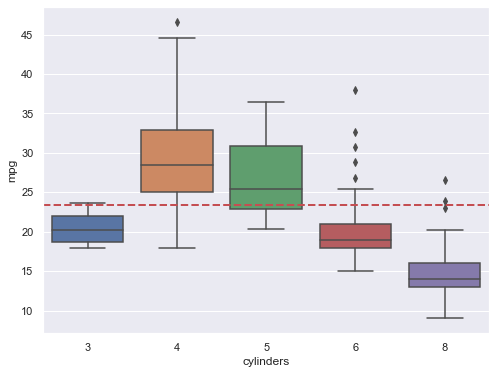

In [91]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='cylinders', y="mpg", data=data)
plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

We see that majority of high mpg cars have 4-5 cylinders

### Correlation HeatMap to observe relationships among columns

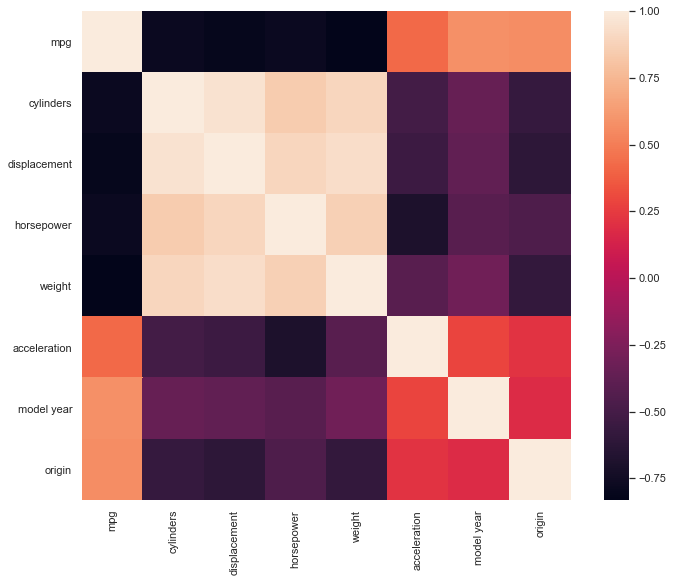

In [92]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

Here we make the following observations: 
* A strong positive correlation among set1: `'cylinders', 'displacement', 'horsepower', 'weight'`
* A moderate/weak positive correlation among set2: `'acceleration', 'model year', 'origin'`
* A moderate/weak negative correlation between `set1` and `set2`
* A strong negative correlation of `mpg` with `set1`
* A strong positive correlation of `mpg` with `set2`

### Pair Plot Matrix to see data behavior and trends

C:\Users\aurko\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\aurko\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\aurko\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\aurko\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\aurko\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\aurko\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWar

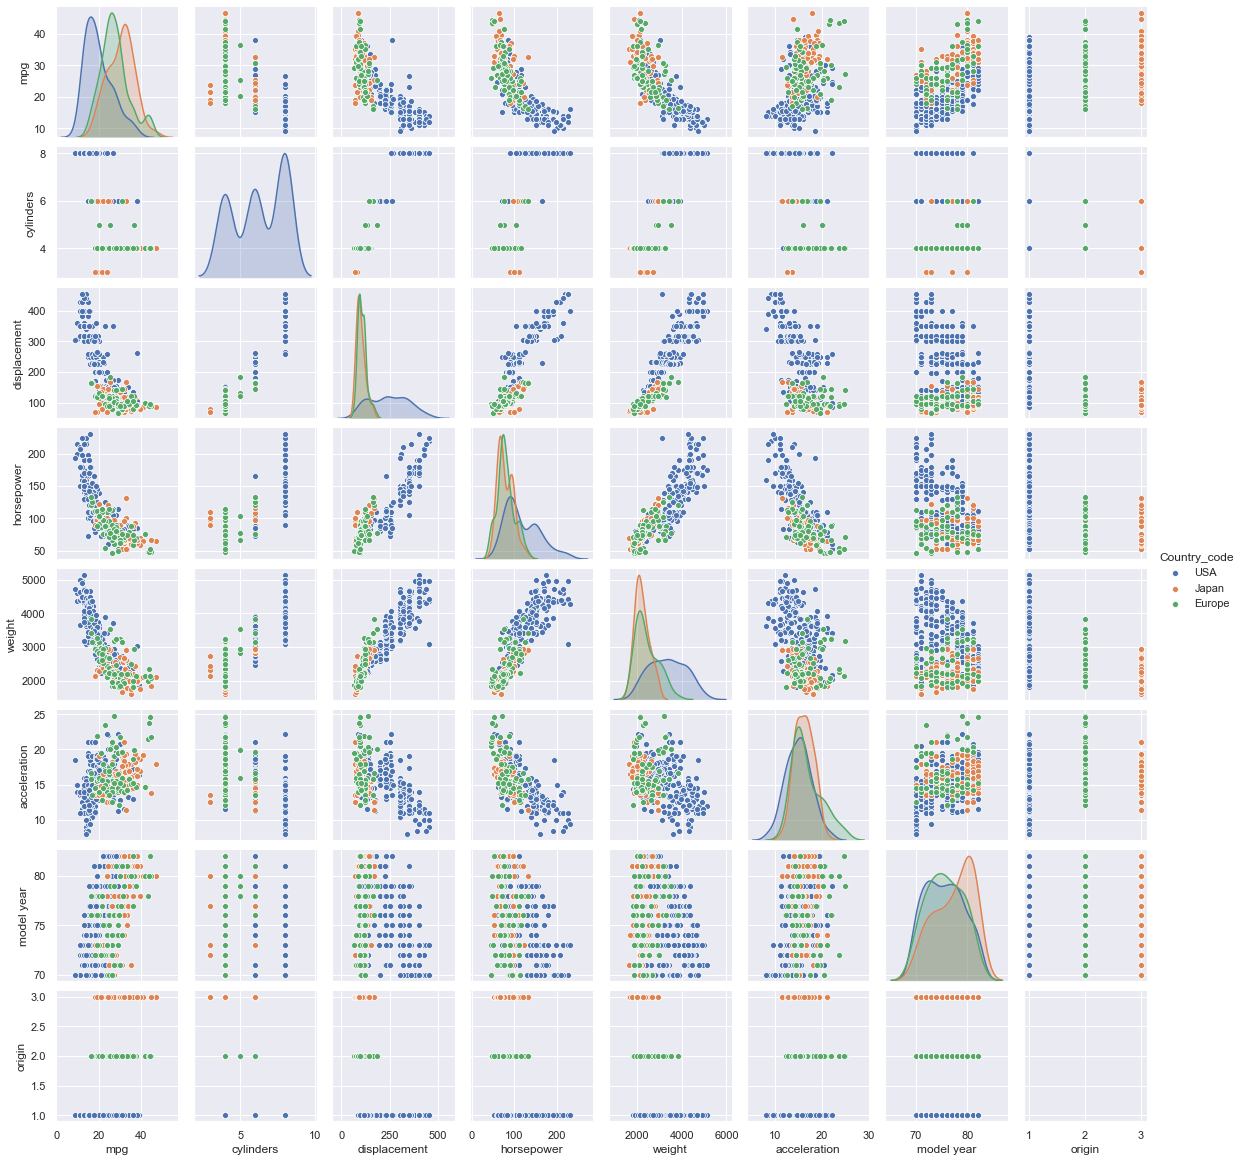

In [93]:
#scatterplot
sns.set()
sns.pairplot(data, size = 2.0,hue ='Country_code')
plt.show()

Here as the data shows, we can easily cluster `USA` apart from the trends in `Japan & Europe`, which are quite alike in terms of `displacement`, `horsepower`, `weight`, `acceleration` and more

### Cleaning the data

In [94]:
data['car name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 392, dtype: object

In [95]:
len(data['car name'].unique())

301

Extracting and adding company name instead of full car model name

In [96]:
data['Company_Name'] = data['car name'].str.extract('(^.*?)\s')
data

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name Country_code Company_Name  
0            70       1  chevrolet chevelle malibu          USA    chevrolet  
1            70       1          buick skylark 320          USA        buick  
2            70       1         plymouth satellite          USA     plymouth  
3            70       1              amc rebel sst          USA          amc  
4            70       1                ford torino          USA         ford  
..          ...     ...                        ...          ...          ...  
393          82       1            ford mustang gl          USA         ford  
394          82       2                  vw pickup       Europe           vw  
395          82       1              dodge rampage          USA        dodge  
396          82       1                ford ranger          USA         ford  
397          82       1                 chevy s-10          USA        chevy  

[392 rows x 11 columns]

Removing typos and further refining Company_Name

In [97]:
data['Company_Name'] = data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['Company_Name'] = data['Company_Name'].replace('maxda','mazda')
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
data['Company_Name'].fillna(value = 'subaru',inplace=True)  ## String methords will not work on null values so we use fillna()

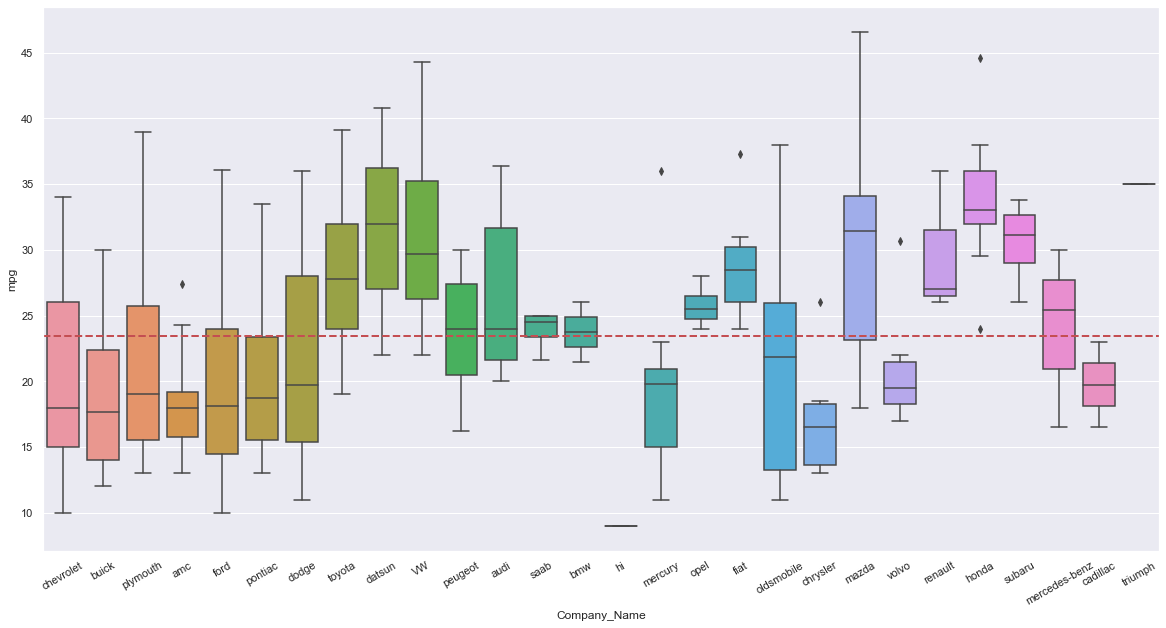

In [98]:
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x='Company_Name', y="mpg", data=data)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [99]:
data.Company_Name.isnull().any()

False

No null values found

### LM Plot (lineplot)

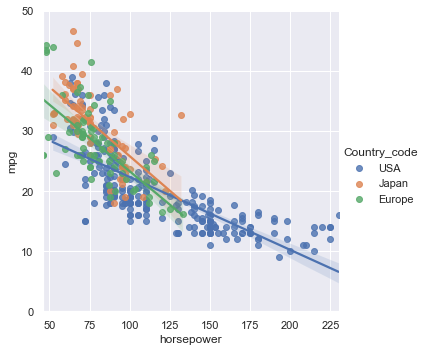

In [100]:
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

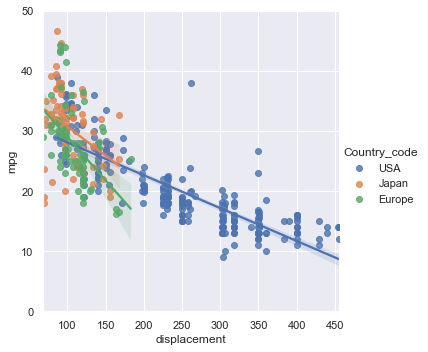

In [101]:
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

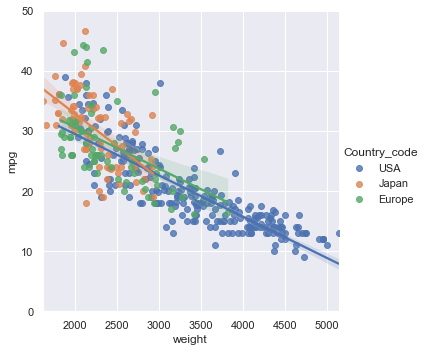

In [102]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

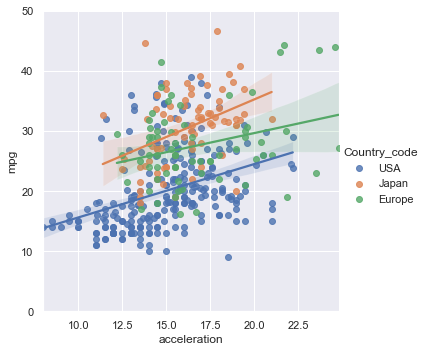

In [103]:
var = 'acceleration'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

### Linear Regression

### Preprocessing 
i. **Removing** all unnecessary columns

In [104]:
# Removing the car name column
data.drop(['Country_code','car name'], axis='columns', inplace=True)
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin Company_Name  
0          70       1    chevrolet  
1          70       1        buick  
2          70       1     plymouth  
3          70       1          amc  
4          70       1         ford

ii. **Label Encoding** of 'Company_Name'

In [112]:
le = LabelEncoder()
le.fit(data.Company_Name)
data.Company_Name = le.transform(data.Company_Name)
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin  Company_Name  
0          70       1             6  
1          70       1             4  
2          70       1            20  
3          70       1             1  
4          70       1            11

### Scaling the data

In [113]:
X = pd.DataFrame(data.drop('mpg', axis='columns'))
y = data['mpg'].copy()

In [114]:
X = StandardScaler().fit_transform(X)

### Train test split 80-20

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=0)

In [116]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)

RMSE score

In [117]:
rmse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.1896183026325042

Train score

In [118]:
regressor.score(X_train, y_train)

0.8165461541902288

Test score

In [119]:
regressor.score(X_test,y_test)

0.8363186649366067

## 1B: Logistic regression

General Steps:
1. Load the dataset (Use pandas )
2. Data Preprocessing (Handling NA values)
3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib 
4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)
5. Build the model (use scikit learn)
6. Summarize the model. 
7. Prediction
8. Evaluate the model 
9. Tuning the model

### 1. Load the dataset

In [122]:
df = pd.read_csv('horse.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

<u>**Attribute Information:**</u>

**1: surgery?** 
1 = Yes, it had surgery
2 = It was treated without surgery

**2: Age** 
1 = Adult horse 
2 = Young (< 6 months) 

**3: Hospital Number** 
- numeric id 
- the case number assigned to the horse (may not be unique if the horse is treated > 1 time) 

**4: rectal temperature** 
- linear 
- in degrees celsius. 
- An elevated temp may occur due to infection. 
- temperature may be reduced when the animal is in late shock 
- normal temp is 37.8 
- this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock 

**5: pulse** 
- linear 
- the heart rate in beats per minute 
- is a reflection of the heart condition: 30 -40 is normal for adults 
- rare to have a lower than normal rate although athletic horses may have a rate of 20-25 
- animals with painful lesions or suffering from circulatory shock may have an elevated heart rate 

**6: respiratory rate** 
- linear 
- normal rate is 8 to 10 
- usefulness is doubtful due to the great fluctuations 

**7: temperature of extremities** 
- a subjective indication of peripheral circulation 
- possible values: 
1 = Normal 
2 = Warm 
3 = Cool 
4 = Cold 
- cool to cold extremities indicate possible shock 
- hot extremities should correlate with an elevated rectal temp. 

**8: peripheral pulse** 
- subjective 
- possible values are: 
1 = normal 
2 = increased 
3 = reduced 
4 = absent 
- normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion 

**9: mucous membranes** 
- a subjective measurement of colour 
- possible values are: 
1 = normal pink 
2 = bright pink 
3 = pale pink 
4 = pale cyanotic 
5 = bright red / injected 
6 = dark cyanotic 
- 1 and 2 probably indicate a normal or slightly increased circulation 
- 3 may occur in early shock 
- 4 and 6 are indicative of serious circulatory compromise 
- 5 is more indicative of a septicemia 

**10: capillary refill time** 
- a clinical judgement. The longer the refill, the poorer the circulation 
- possible values 
1 = < 3 seconds 
2 = >= 3 seconds 

**11: pain** 
- a subjective judgement of the horse's pain level 
- possible values: 
1 = alert, no pain 
2 = depressed 
3 = intermittent mild pain 
4 = intermittent severe pain 
5 = continuous severe pain 
- should NOT be treated as a ordered or discrete variable! 
- In general, the more painful, the more likely it is to require surgery 
- prior treatment of pain may mask the pain level to some extent 

**12: peristalsis** 
- An indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases 
- possible values: 
1 = hypermotile 
2 = normal 
3 = hypomotile 
4 = absent 

**13: abdominal distension** 
- An IMPORTANT parameter. 
- possible values 
1 = none 
2 = slight 
3 = moderate 
4 = severe 
- an animal with abdominal distension is likely to be painful and have reduced gut motility. 
- a horse with severe abdominal distension is likely to require surgery just tio relieve the pressure 

**14: nasogastric tube** 
- this refers to any gas coming out of the tube 
- possible values: 
1 = none 
2 = slight 
3 = significant 
- a large gas cap in the stomach is likely to give the horse discomfort 

**15: nasogastric reflux** 
- possible values 
1 = none 
2 = > 1 liter 
3 = < 1 liter 
- the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine 

**16: nasogastric reflux PH** 
- linear 
- scale is from 0 to 14 with 7 being neutral 
- normal values are in the 3 to 4 range 

**17: rectal examination - feces** 
- possible values 
1 = normal 
2 = increased 
3 = decreased 
4 = absent 
- absent feces probably indicates an obstruction 

**18: abdomen** 
- possible values 
1 = normal 
2 = other 
3 = firm feces in the large intestine 
4 = distended small intestine 
5 = distended large intestine 
- 3 is probably an obstruction caused by a mechanical impaction and is normally treated medically 
- 4 and 5 indicate a surgical lesion 

**19: packed cell volume** 
- linear 
- the # of red cells by volume in the blood 
- normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated. 

**20: total protein** 
- linear 
- normal values lie in the 6-7.5 (gms/dL) range 
- the higher the value the greater the dehydration 

**21: abdominocentesis appearance** 
- a needle is put in the horse's abdomen and fluid is obtained from 
the abdominal cavity 
- possible values: 
1 = clear 
2 = cloudy 
3 = serosanguinous 
- normal fluid is clear while cloudy or serosanguinous indicates a compromised gut 

**22: abdomcentesis total protein**
- linear 
- the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL 

**23: outcome** 
- what eventually happened to the horse? 
- possible values: 
1 = lived 
2 = died 
3 = was euthanized 

**24: surgical lesion?** 
- retrospectively, was the problem (lesion) surgical? 
- all cases are either operated upon or autopsied so that this value and the lesion type are always known 
- possible values: 
1 = Yes 
2 = No 

**25, 26, 27: type of lesion** 
- first number is site of lesion 
1 = gastric 
2 = sm intestine 
3 = lg colon 
4 = lg colon and cecum 
5 = cecum 
6 = transverse colon 
7 = retum/descending colon 
8 = uterus 
9 = bladder 
11 = all intestinal sites 
00 = none 

- second number is type 
1 = simple 
2 = strangulation 
3 = inflammation 
4 = other 

- third number is subtype 
1 = mechanical 
2 = paralytic 
0 = n/a 

- fourth number is specific code 
1 = obturation 
2 = intrinsic 
3 = extrinsic 
4 = adynamic 
5 = volvulus/torsion 
6 = intussuption 
7 = thromboembolic 
8 = hernia 
9 = lipoma/slenic incarceration 
10 = displacement 
0 = n/a 

**28: cp_data** 
- is pathology data present for this case? 
1 = Yes 
2 = No 
- this variable is of no significance since pathology data is not included or collected for these cases

In [123]:
df.head()

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               45.0           8.4               NaN            NaN   
1  ...               50.0          85.0            cloudy            2.0   
2  ...               33.0           6.7               NaN            NaN   
3  ...               48.0           7.2     serosanguious            5.3   
4  ...               74.0           7.4               NaN            NaN   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0        died               no    11300        0         0       no  
1  euthanized               no     2208        0         0       no  
2       lived               no        0        0         0      yes  
3        died              yes     2208        0         0      yes  
4        died               no     4300        0         0       no  

[5 rows x 28 columns]

Removing redundant features before filling missing values:

In [124]:
df.drop(columns = ['cp_data', 'hospital_number'], inplace = True)

In [125]:
px.scatter_3d(df, x='lesion_1', y='lesion_2', z='lesion_3', color='outcome').show()

#### The points not falling on the axis indicate entries with >1 lesion types, 
- We therefore derive the count of lesions instead of information about the site, subtype etc, which is in an encoded format which can't be further used.

In [126]:
df.loc[df['lesion_1'] > 0, 'lesion_1'] = 1
df.loc[df['lesion_2'] > 0, 'lesion_2'] = 1
df.loc[df['lesion_3'] > 0, 'lesion_3'] = 1
# Storing counts
df['num_lesions'] = df['lesion_1'] + df['lesion_2'] + df['lesion_3']
df = df.drop(columns = ['lesion_1','lesion_2', 'lesion_3'], axis = 1)

print("Value distribution of num_lesions")
px.bar(df['num_lesions'].value_counts().sort_index())

Value distribution of num_lesions


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    object 
 6   peripheral_pulse       230 non-null    object 
 7   mucous_membrane        252 non-null    object 
 8   capillary_refill_time  267 non-null    object 
 9   pain                   244 non-null    object 
 10  peristalsis            255 non-null    object 
 11  abdominal_distention   243 non-null    object 
 12  nasogastric_tube       195 non-null    object 
 13  nasogastric_reflux     193 non-null    object 
 14  nasogastric_reflux_ph  53 non-null     float64
 15  rectal

In [128]:
def new_punctuation(df): 
    #This manual ordinal encoder was done looking at the documentation to ensure they follow the correct scale (for ex: more pain -> bigger number)
    '''
    0   surgery                299 non-null    object * 'yes':1,'no':2
    1   age                    299 non-null    object * 'adult':1,'young':2
    6   temp_of_extremities    243 non-null    object * 'normal':1,'warm':2,'cool':3,'cold':4
    7   peripheral_pulse       230 non-null    object * 'normal':1,'increased':2,'reduced':3,'absent':4
    8   mucous_membrane        252 non-null    object * 'dark_cyanotic':6,'bright_red':5,'pale_cyanotic':4,'pale_pink':3,'bright_pink':2,'normal_pink':1
    9   capillary_refill_time  267 non-null    object * 'more_3_sec':3, '3':2, 'less_3_sec':1
    10  pain                   244 non-null    object * 'extreme_pain':5, 'severe_pain':4, 'mild_pain':3, 'depressed':2, 'alert':1
    11  peristalsis            255 non-null    object * 'absent':4, 'hypomotile':3, 'normal':2, 'hypermotile':1
    12  abdominal_distention   243 non-null    object * 'severe':4,'moderate':3,'slight':2,'none':1
    13  nasogastric_tube       195 non-null    object * 'significant':3, 'slight':2, 'none':1
    14  nasogastric_reflux     193 non-null    object * 'more_1_liter':3, 'less_1_liter':2, 'none':1
    16  rectal_exam_feces      197 non-null    object * 'absent':4, 'decreased':3, 'increased':2, 'normal':1
    17  abdomen                181 non-null    object * 'distend_large':5, 'distend_small':4, 'firm':3, 'other':2, 'normal':1
    20  abdomo_appearance      134 non-null    object * 'serosanguious':3, 'cloudy':2, 'clear':1
    22  outcome                299 non-null    object * 'euthanized':3, 'died':2, 'lived':1
    23  surgical_lesion        299 non-null    object * 'yes':1,'no':2
    '''
    
    df['surgery'] = df['surgery'].map({'yes':1,'no':2}).astype('float64')
    df['age'] = df['age'].map({'adult':1,'young':2}).astype('float64')
    df['temp_of_extremities'] = df['temp_of_extremities'].map({'normal':1,'warm':2,'cool':3,'cold':4}).astype('float64')
    df['peripheral_pulse'] = df['peripheral_pulse'].map({'increased':2,'normal':1,'reduced':3,'absent':4}).astype('float64')
    df['mucous_membrane'] = df['mucous_membrane'].map({'dark_cyanotic':6,'bright_red':5,'pale_cyanotic':4,'pale_pink':3,'bright_pink':2,'normal_pink':1}).astype('float64')
    df['capillary_refill_time'] = df['capillary_refill_time'].map({'more_3_sec':3, '3':2, 'less_3_sec':1}).astype('float64')
    df['pain'] = df['pain'].map({'extreme_pain':5, 'severe_pain':4, 'mild_pain':3, 'depressed':2, 'alert':1}).astype('float64')
    df['peristalsis'] = df['peristalsis'].map({'absent':4, 'hypomotile':3, 'normal':2, 'hypermotile':1}).astype('float64')
    df['abdominal_distention'] = df['abdominal_distention'].map({'severe':4,'moderate':3,'slight':2,'none':1}).astype('float64')
    df['nasogastric_tube'] = df['nasogastric_tube'].map({'significant':3, 'slight':2, 'none':1}).astype('float64')
    df['nasogastric_reflux'] = df['nasogastric_reflux'].map({'more_1_liter':3, 'less_1_liter':2, 'none':1}).astype('float64')
    df['rectal_exam_feces'] = df['rectal_exam_feces'].map({'absent':4, 'decreased':3, 'increased':2, 'normal':1}).astype('float64')
    df['abdomen'] = df['abdomen'].map({'distend_large':5, 'distend_small':4, 'firm':3, 'other':2, 'normal':1}).astype('float64')
    df['abdomo_appearance'] = df['abdomo_appearance'].map({'serosanguious':3, 'cloudy':2, 'clear':1}).astype('float64')
    df['outcome'] = df['outcome'].map({'euthanized':3, 'died':2, 'lived':1}).astype('float64')
    df['surgical_lesion'] = df['surgical_lesion'].map({'yes':1,'no':2}).astype('float64')
    return df

df = new_punctuation(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    float64
 1   age                    299 non-null    float64
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    float64
 6   peripheral_pulse       230 non-null    float64
 7   mucous_membrane        252 non-null    float64
 8   capillary_refill_time  267 non-null    float64
 9   pain                   244 non-null    float64
 10  peristalsis            255 non-null    float64
 11  abdominal_distention   243 non-null    float64
 12  nasogastric_tube       195 non-null    float64
 13  nasogastric_reflux     193 non-null    float64
 14  nasogastric_reflux_ph  53 non-null     float64
 15  rectal

### Data Preprocessing

plotting count of all non-nan values on all columns, 

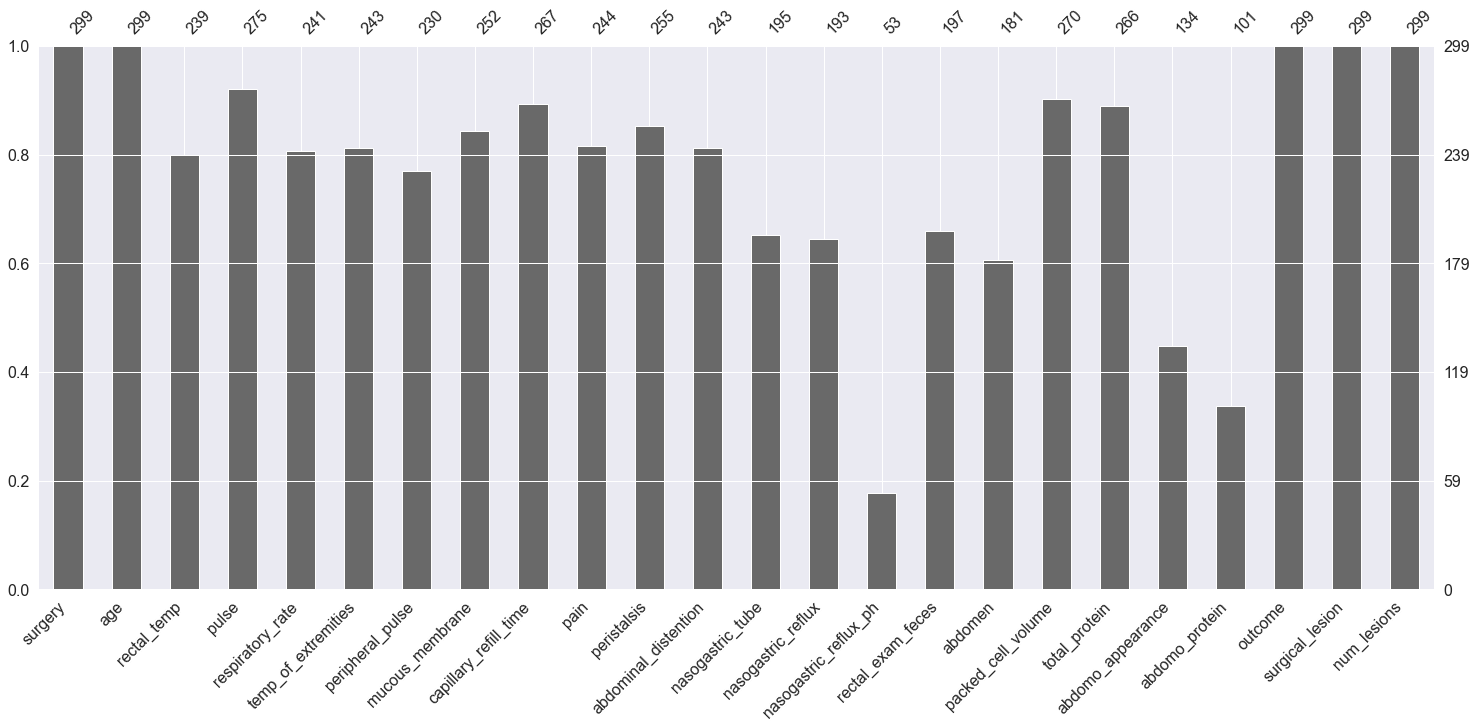

In [129]:
mn.bar(df)

We plot the matrix of missing numbers for the respective columns and see the distribution of missing values, and decide to get rid of columns with less than **70%** entries having data, **i.e. nasogastric_tube, ...abdomen, abdomo_appearance, abdomo_protein**.

In [130]:
df.drop(columns=['nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 
         'abdomo_appearance', 'abdomo_protein'],inplace=True)
df.head()

surgery  age  rectal_temp  pulse  respiratory_rate  temp_of_extremities  \
0      2.0  1.0         38.5   66.0              28.0                  3.0   
1      1.0  1.0         39.2   88.0              20.0                  NaN   
2      2.0  1.0         38.3   40.0              24.0                  1.0   
3      1.0  2.0         39.1  164.0              84.0                  4.0   
4      2.0  1.0         37.3  104.0              35.0                  NaN   

   peripheral_pulse  mucous_membrane  capillary_refill_time  pain  \
0               3.0              NaN                    3.0   5.0   
1               NaN              4.0                    1.0   3.0   
2               1.0              3.0                    1.0   3.0   
3               1.0              6.0                    3.0   2.0   
4               NaN              6.0                    3.0   NaN   

   peristalsis  abdominal_distention  packed_cell_volume  total_protein  \
0          4.0                   4.0                45.0            8.4   
1          4.0                   2.0                50.0           85.0   
2          3.0                   1.0                33.0            6.7   
3          4.0                   4.0                48.0            7.2   
4          NaN                   NaN                74.0            7.4   

   outcome  surgical_lesion  num_lesions  
0      2.0              2.0            1  
1      3.0              2.0            1  
2      1.0              2.0            0  
3      2.0              1.0            1  
4      2.0              2.0            1

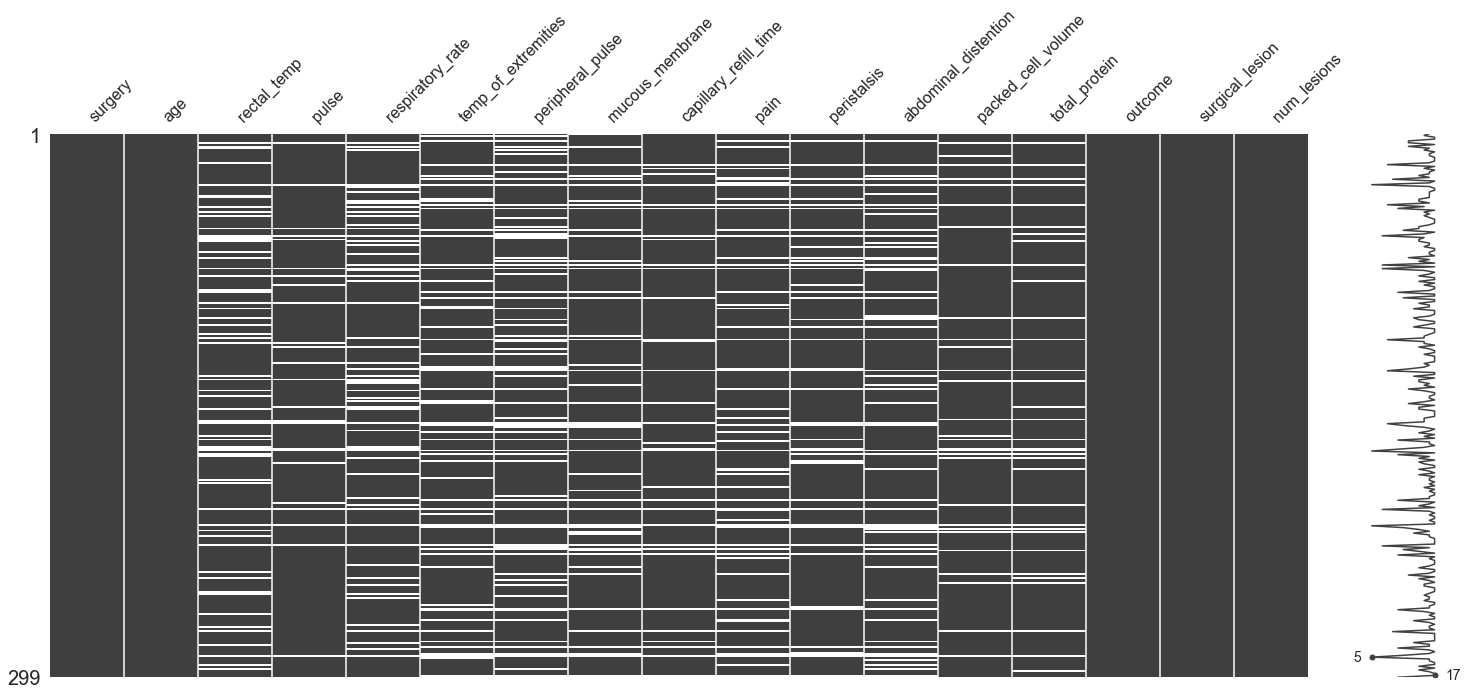

In [131]:
mn.matrix(df)

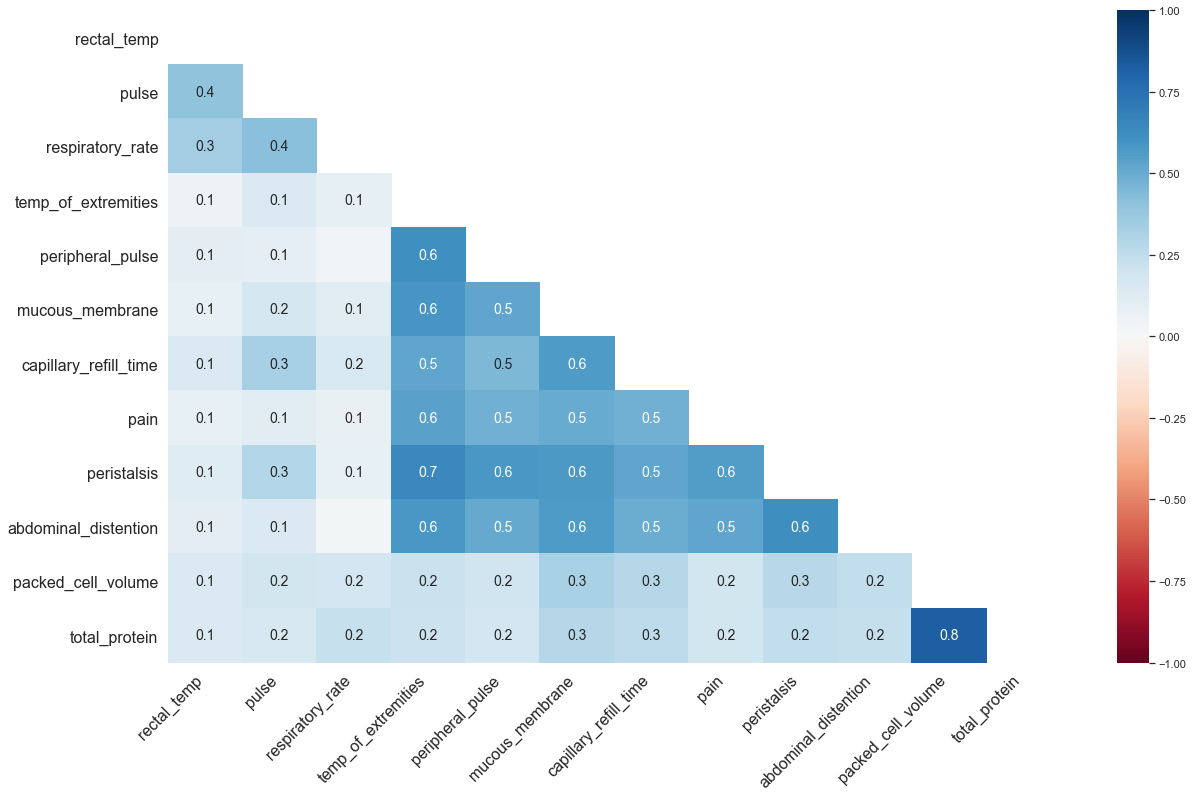

In [132]:
mn.heatmap(df)

In [133]:
null_counts = 299 - df.count()
print("Value distribution of null counts")
px.bar(null_counts.sort_values(ascending=False))

Value distribution of null counts


We observe from the heatmap that the columns **temp_of_extremeties, ... abdominal_distention** is highly correlated in it's null values, so removal of any one/two of these column's null rows will remove most null values
- Hence we remove the nan rows of **peripheral_pulse, rectal_temp**, and populate the rest of the nan values with their default(avg case) values.

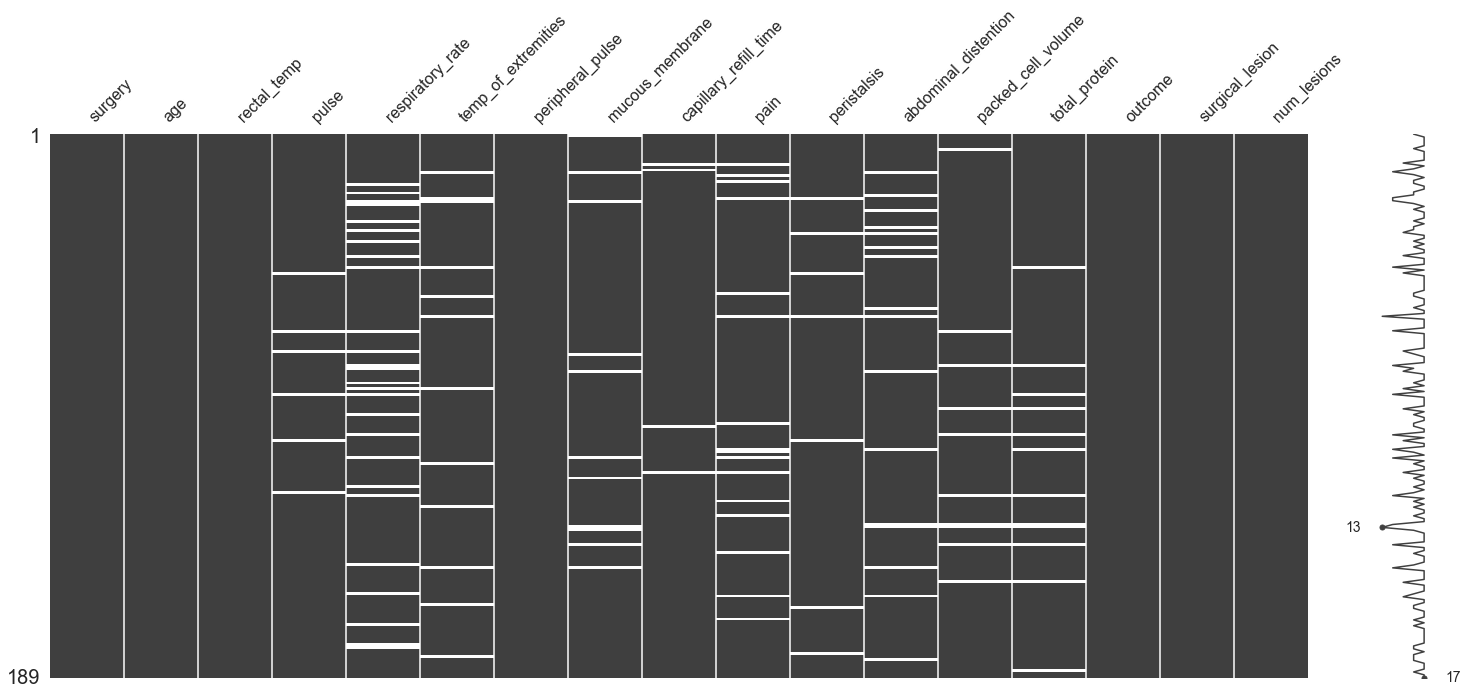

In [134]:
df.dropna(how='any', subset=['peripheral_pulse', 'rectal_temp'], inplace=True)
mn.matrix(df)

Fill the remaining nan values with default values

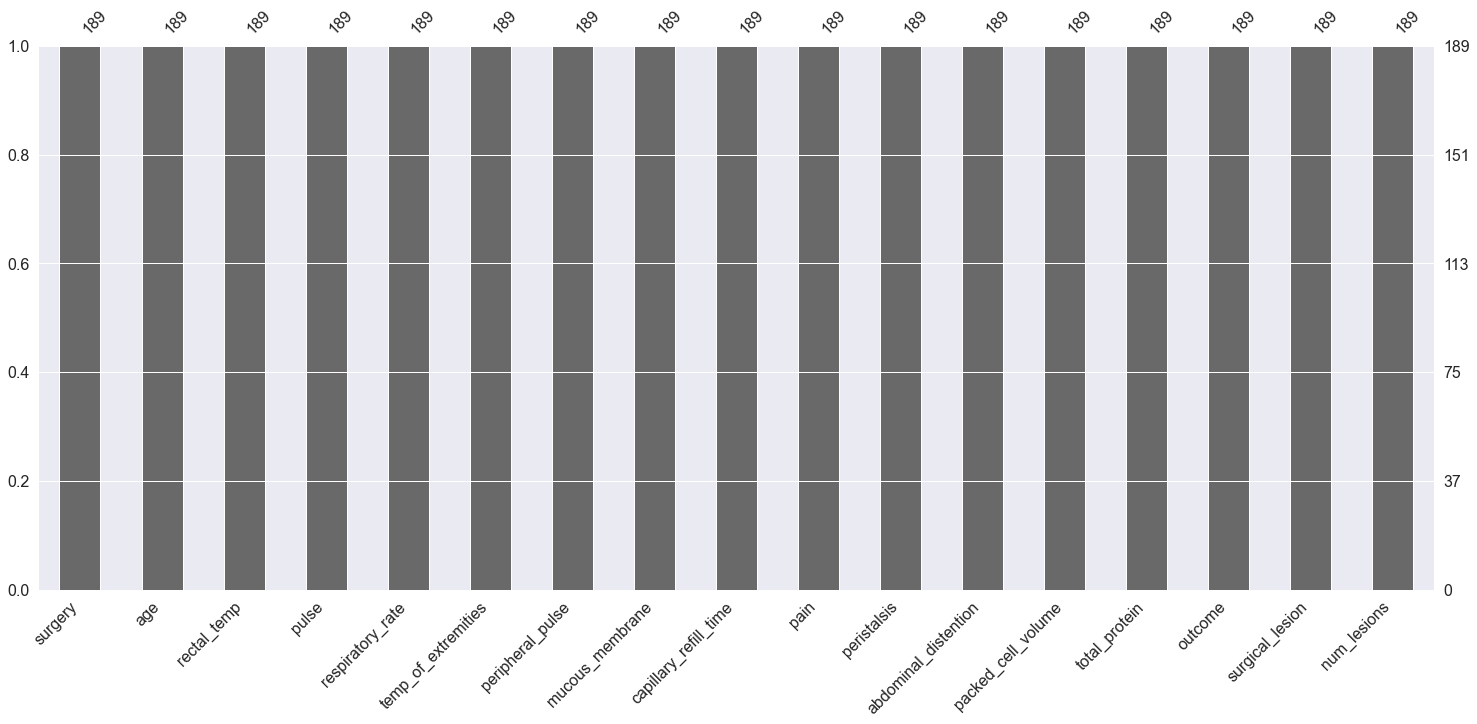

In [135]:
df=df.fillna(1)
mn.bar(df)

Now we have clean data in the numerical format, ready for analysis

### Exploratory Data Analysis

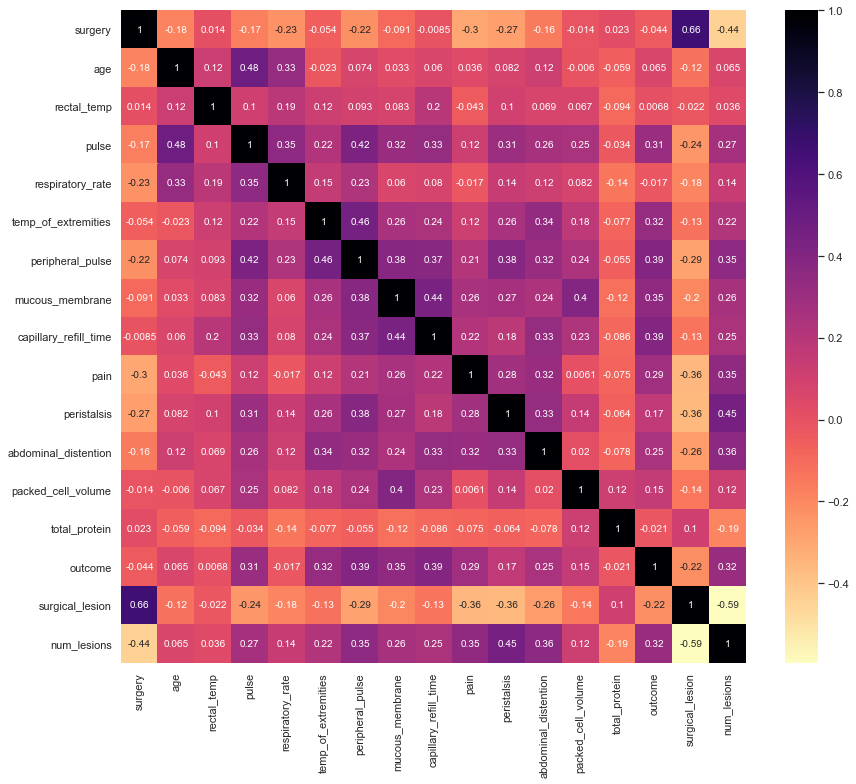

In [136]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),cmap='magma_r',annot=True)

We can see how 

bigger pain => lesser chances of survival,

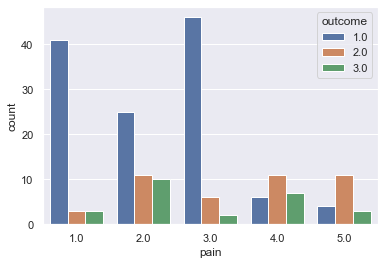

In [137]:
sns.countplot(data=df, x='pain', hue = 'outcome')

worse circulation => mucus membranes' color => less the chance of survival,

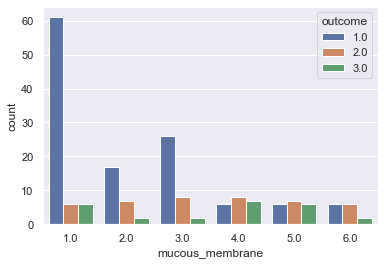

In [138]:
sns.countplot(data=df, x='mucous_membrane', hue = 'outcome')

We can see how worse circulation => less the chance of survival,

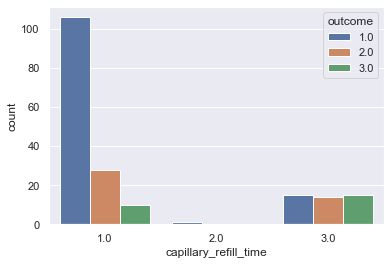

In [139]:
sns.countplot(data=df, x='capillary_refill_time', hue = 'outcome') #

Lesser activity on the horses => lesser the chance of survival,

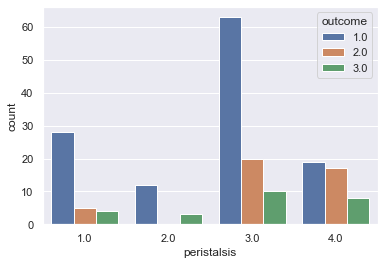

In [140]:
sns.countplot(data=df, x='peristalsis', hue = 'outcome')

More distended abdomen => lesser chances of survival (distention means more pain)

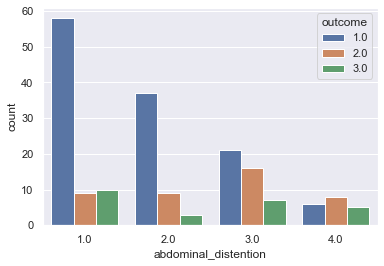

In [141]:
sns.countplot(data=df, x='abdominal_distention', hue = 'outcome')

Younger horses tend to survive less

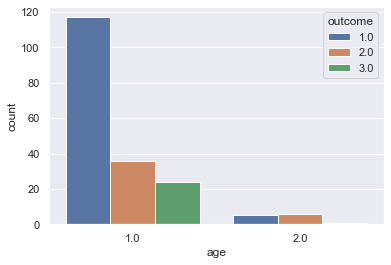

In [142]:
sns.countplot(data=df, x='age', hue = 'outcome')

**Outlier Detection**

In [143]:
px.box(df)

We detect and remove the big upper outliers present in "respiratory_rate", and "packed_cell_volume", and the big lower outlier in "packed cell volume"

In [144]:
px.box(df,y="pulse").show()
# removing the higher end outliers
Q1 = df['pulse'].quantile(0.25)
Q3 = df['pulse'].quantile(0.75)
IQR = Q3 - Q1
big_outliers = df['pulse'] > (Q3 + 1.5 * IQR)
df.drop(labels=df[big_outliers].index, axis=0, inplace = True)

In [145]:
px.box(df,y="respiratory_rate").show()
# removing the higher end outliers 
Q1 = df['respiratory_rate'].quantile(0.25)
Q3 = df['respiratory_rate'].quantile(0.75)
IQR = Q3 - Q1
big_outliers = df['respiratory_rate'] > (Q3 + 1.5 * IQR)
df.drop(labels=df[big_outliers].index, axis=0, inplace = True)

In [146]:
px.box(df,y="packed_cell_volume").show()
# removing the lower end outliers 
Q1 = df['respiratory_rate'].quantile(0.25)
Q3 = df['respiratory_rate'].quantile(0.75)
IQR = Q3 - Q1
less_outliers = df['respiratory_rate'] < (Q1 - 1.5 * IQR)
df.drop(labels=df[less_outliers].index, axis=0, inplace = True)

In [147]:
df.describe()

surgery         age  rectal_temp       pulse  respiratory_rate  \
count  178.000000  178.000000   178.000000  178.000000        178.000000   
mean     1.449438    1.039326    38.172472   66.275281         23.370787   
std      0.498840    0.194917     0.731128   27.859161         14.691080   
min      1.000000    1.000000    35.400000    1.000000          1.000000   
25%      1.000000    1.000000    37.800000   48.000000         12.000000   
50%      1.000000    1.000000    38.100000   60.000000         24.000000   
75%      2.000000    1.000000    38.500000   86.000000         32.000000   
max      2.000000    2.000000    40.800000  140.000000         66.000000   

       temp_of_extremities  peripheral_pulse  mucous_membrane  \
count           178.000000        178.000000       178.000000   
mean              2.185393          1.859551         2.617978   
std               1.075884          0.995722         1.636488   
min               1.000000          1.000000         1.000000   
25%               1.000000          1.000000         1.000000   
50%               2.000000          1.000000         2.000000   
75%               3.000000          3.000000         4.000000   
max               4.000000          4.000000         6.000000   

       capillary_refill_time        pain  peristalsis  abdominal_distention  \
count             178.000000  178.000000   178.000000            178.000000   
mean                1.455056    2.601124     2.747191              2.016854   
std                 0.837471    1.254776     1.035046              1.016667   
min                 1.000000    1.000000     1.000000              1.000000   
25%                 1.000000    2.000000     2.000000              1.000000   
50%                 1.000000    3.000000     3.000000              2.000000   
75%                 1.000000    3.000000     3.000000              3.000000   
max                 3.000000    5.000000     4.000000              4.000000   

       packed_cell_volume  total_protein     outcome  surgical_lesion  \
count          178.000000     178.000000  178.000000       178.000000   
mean            43.713483      22.365169    1.494382         1.421348   
std             14.383349      26.649746    0.722888         0.495168   
min              1.000000       1.000000    1.000000         1.000000   
25%             37.000000       6.500000    1.000000         1.000000   
50%             44.000000       7.200000    1.000000         1.000000   
75%             50.000000      53.750000    2.000000         2.000000   
max             75.000000      82.000000    3.000000         2.000000   

       num_lesions  
count   178.000000  
mean      0.797753  
std       0.442892  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       2.000000

### Data Partition and Normalisation

In [148]:
dfTrain,dfTest = train_test_split(df, test_size=0.2, random_state=0)

# Extracting targets
trainTarget = dfTrain.pop('outcome')
testTarget = dfTest.pop('outcome')
# Assigning the columns as features
features = dfTrain.columns

# Normalisation
scaler = StandardScaler()
scaledTrain = scaler.fit_transform(dfTrain)
scaledTest = scaler.transform(dfTest) # we transform the test set with the model trained on the train set

# Build a normalised dataframe 
dfTrain = pd.DataFrame(data=scaledTrain, columns=features) 
dfTest = pd.DataFrame(data=scaledTest, columns=features)   

In [149]:
dfTrain.describe()

surgery           age   rectal_temp         pulse  \
count  1.420000e+02  1.420000e+02  1.420000e+02  1.420000e+02   
mean  -3.596497e-17  1.551967e-16 -6.805198e-15 -2.306449e-16   
std    1.003540e+00  1.003540e+00  1.003540e+00  1.003540e+00   
min   -9.187795e-01 -1.702513e-01 -3.822916e+00 -2.288810e+00   
25%   -9.187795e-01 -1.702513e-01 -5.353819e-01 -6.090740e-01   
50%   -9.187795e-01 -1.702513e-01 -1.244401e-01 -2.516835e-01   
75%    1.088400e+00 -1.702513e-01  4.234823e-01  5.881843e-01   
max    1.088400e+00  5.873670e+00  3.574036e+00  2.678919e+00   

       respiratory_rate  temp_of_extremities  peripheral_pulse  \
count      1.420000e+02         1.420000e+02      1.420000e+02   
mean       3.596497e-17         8.209396e-17      4.691083e-17   
std        1.003540e+00         1.003540e+00      1.003540e+00   
min       -1.526011e+00        -1.101193e+00     -8.219110e-01   
25%       -7.714590e-01        -1.101193e+00     -8.219110e-01   
50%        5.168823e-02        -1.759303e-01     -8.219110e-01   
75%        6.004530e-01         7.493328e-01      1.207852e+00   
max        2.932703e+00         1.674596e+00      2.222733e+00   

       mucous_membrane  capillary_refill_time          pain   peristalsis  \
count     1.420000e+02           1.420000e+02  1.420000e+02  1.420000e+02   
mean      5.981131e-17          -1.469873e-16  7.036625e-17 -2.286903e-16   
std       1.003540e+00           1.003540e+00  1.003540e+00  1.003540e+00   
min      -9.871715e-01          -5.475347e-01 -1.273540e+00 -1.647732e+00   
25%      -9.871715e-01          -5.475347e-01 -4.838339e-01 -6.848599e-01   
50%      -3.829545e-01          -5.475347e-01  3.058720e-01  2.780124e-01   
75%       8.254796e-01          -5.475347e-01  3.058720e-01  2.780124e-01   
max       2.033914e+00           1.844771e+00  1.885284e+00  1.240885e+00   

       abdominal_distention  packed_cell_volume  total_protein  \
count          1.420000e+02        1.420000e+02   1.420000e+02   
mean           2.189172e-17       -2.525366e-16   1.258774e-16   
std            1.003540e+00        1.003540e+00   1.003540e+00   
min           -9.895041e-01       -3.205950e+00  -8.097133e-01   
25%           -9.895041e-01       -5.484478e-01  -6.070514e-01   
50%            7.017760e-03       -3.171120e-02  -5.794157e-01   
75%            1.003540e+00        4.112059e-01   1.198482e+00   
max            2.000062e+00        2.256694e+00   2.174943e+00   

       surgical_lesion   num_lesions  
count     1.420000e+02  1.420000e+02  
mean     -1.751338e-16  4.925637e-17  
std       1.003540e+00  1.003540e+00  
min      -8.803408e-01 -1.725734e+00  
25%      -8.803408e-01  4.622502e-01  
50%      -8.803408e-01  4.622502e-01  
75%       1.135924e+00  4.622502e-01  
max       1.135924e+00  2.650234e+00

### LINEAR MODELS

**Logistic Regression**

Build and summarise model (scikit-learn)

In [150]:
regr = LogisticRegression()

# Train the model using the training sets
regr.fit(dfTrain, trainTarget)

# Make predictions using the testing set
test_pred = regr.predict(dfTest)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(testTarget, test_pred))
# The coefficient of determination: 1 is perfect prediction
print("score: %.2f" % regr.score(dfTest, testTarget))

Coefficients: 
 [[-0.46117952 -0.18628759 -0.01978924 -0.27436964  0.03078488 -0.34678291
  -0.3910992  -0.16818188  0.2562413  -0.62425942  0.38367372 -0.13977699
  -0.23065771  0.34196785  0.55109321 -0.55555028]
 [ 0.2587099   0.28730885  0.09300502 -0.16615021  0.07332379 -0.1746528
   0.30200797 -0.07362402 -0.55100594  0.64199162  0.21714583  0.49784343
   1.00044882 -1.25345776 -0.63261028  0.16759842]
 [ 0.20246962 -0.10102125 -0.07321578  0.44051984 -0.10410867  0.52143571
   0.08909123  0.2418059   0.29476464 -0.0177322  -0.60081955 -0.35806644
  -0.7697911   0.91148991  0.08151708  0.38795185]]
Mean squared error: 1.03
score: 0.64


**Improving performance**

Trying one hot encoding instead of Label encoding

In [151]:
'''
    0   surgery                299 non-null    object * 'yes':1,'no':2
    1   age                    299 non-null    object * 'adult':1,'young':2
    23  surgical_lesion        299 non-null    object * 'yes':1,'no':2
    13  nasogastric_tube       195 non-null    object * 'significant':3, 'slight':2, 'none':1
    14  nasogastric_reflux     193 non-null    object * 'more_1_liter':3, 'less_1_liter':2, 'none':1
    20  abdomo_appearance      134 non-null    object * 'serosanguious':3, 'cloudy':2, 'clear':1
    22  outcome                299 non-null    object * 'euthanized':3, 'died':2, 'lived':1
    
    6   temp_of_extremities    243 non-null    object * 'normal':1,'warm':2,'cool':3,'cold':4
    7   peripheral_pulse       230 non-null    object * 'normal':1,'increased':2,'reduced':3,'absent':4
    8   mucous_membrane        252 non-null    object * 'dark_cyanotic':6,'bright_red':5,'pale_cyanotic':4,'pale_pink':3,'bright_pink':2,'normal_pink':1
    9   capillary_refill_time  267 non-null    object * 'more_3_sec':3, '3':2, 'less_3_sec':1
    10  pain                   244 non-null    object * 'extreme_pain':5, 'severe_pain':4, 'mild_pain':3, 'depressed':2, 'alert':1
    11  peristalsis            255 non-null    object * 'absent':4, 'hypomotile':3, 'normal':2, 'hypermotile':1
    12  abdominal_distention   243 non-null    object * 'severe':4,'moderate':3,'slight':2,'none':1
    16  rectal_exam_feces      197 non-null    object * 'absent':4, 'decreased':3, 'increased':2, 'normal':1
    17  abdomen                181 non-null    object * 'distend_large':5, 'distend_small':4, 'firm':3, 'other':2, 'normal':1

'''
categorical_columns = ['temp_of_extremities',
                       'peripheral_pulse',
                       'mucous_membrane',
                       'capillary_refill_time',
                       'pain',
                       'peristalsis',
                       'abdominal_distention',
#                        'rectal_exam_feces', => removed in preprocessing
#                        'abdomen']           => removed in preprocessing
                      ]
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
# combine the outcome column again
df['outcome']=trainTarget.combine(testTarget, (lambda x1, x2: x2 if np.isnan(x1) else x1))
df

surgery  age  rectal_temp  pulse  respiratory_rate  packed_cell_volume  \
0        2.0  1.0         38.5   66.0              28.0                45.0   
2        2.0  1.0         38.3   40.0              24.0                33.0   
6        1.0  1.0         37.9   48.0              16.0                37.0   
10       1.0  1.0         38.1   66.0              12.0                44.0   
12       1.0  1.0         37.2   42.0              12.0                 1.0   
..       ...  ...          ...    ...               ...                 ...   
291      1.0  1.0         37.0   66.0              20.0                35.0   
293      2.0  1.0         38.5   40.0              16.0                37.0   
295      2.0  1.0         37.2   72.0              24.0                44.0   
296      1.0  1.0         37.5   72.0              30.0                60.0   
297      1.0  1.0         36.5  100.0              24.0                50.0   

     total_protein  outcome  surgical_lesion  num_lesions  ...  pain_4.0  \
0              8.4      2.0              2.0            1  ...         0   
2              6.7      1.0              2.0            0  ...         0   
6              7.0      1.0              1.0            1  ...         0   
10             6.0      1.0              1.0            1  ...         0   
12             7.0      1.0              2.0            1  ...         0   
..             ...      ...              ...          ...  ...       ...   
291            6.9      2.0              1.0            1  ...         1   
293           67.0      1.0              2.0            0  ...         0   
295            1.0      3.0              1.0            1  ...         1   
296            6.8      2.0              1.0            1  ...         1   
297            6.0      1.0              1.0            1  ...         0   

     pain_5.0  peristalsis_1.0  peristalsis_2.0  peristalsis_3.0  \
0           1                0                0                0   
2           0                0                0                1   
6           0                0                0                1   
10          0                0                0                1   
12          0                0                0                1   
..        ...              ...              ...              ...   
291         0                0                0                1   
293         0                1                0                0   
295         0                0                0                1   
296         0                0                0                0   
297         0                0                0                1   

     peristalsis_4.0  abdominal_distention_1.0  abdominal_distention_2.0  \
0                  1                         0                         0   
2                  0                         1                         0   
6                  0                         0                         0   
10                 0                         1                         0   
12                 0                         0                         0   
..               ...                       ...                       ...   
291                0                         0                         0   
293                0                         1                         0   
295                0                         0                         0   
296                1                         0                         0   
297                0                         0                         0   

     abdominal_distention_3.0  abdominal_distention_4.0  
0                           0                         1  
2                           0                         0  
6                           1                         0  
10                          0                         0  
12                          1                         0  
..                        ...                       ...  
291    

In [152]:
dfTrain2, dfTest2 = train_test_split(df, test_size=0.2, random_state=0)

# Extracting targets
trainTarget2 = dfTrain2.pop('outcome')
testTarget2 = dfTest2.pop('outcome')
# Assigning the columns as features
features2 = dfTrain2.columns

# Normalisation
scaler2 = StandardScaler()
scaledTrain2 = scaler2.fit_transform(dfTrain2)
scaledTest2 = scaler2.transform(dfTest2) # we transform the test set with the model trained on the train set

# Build a normalised dataframe 
dfTrain2 = pd.DataFrame(data=scaledTrain2, columns=features2) 
dfTest2 = pd.DataFrame(data=scaledTest2, columns=features2)   

In [153]:
regr2 = LogisticRegression()

# Train the model using the training sets
regr2.fit(dfTrain2, trainTarget2)

# Make predictions using the testing set
test_pred2 = regr2.predict(dfTest2)

# The coefficients
print("Coefficients: \n", regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(testTarget2, test_pred2))
# The coefficient of determination: 1 is perfect prediction
print("r2 score: %.2f" % regr2.score(dfTest2, testTarget2))

Coefficients: 
 [[-7.88981226e-01 -1.16393007e-01  1.73921911e-01 -3.34534021e-01
   1.88545300e-02 -5.10724913e-01  2.52877263e-01  7.67508150e-01
  -6.08260709e-01  1.95075199e-01  1.32603873e-01 -3.42663759e-01
   9.36879089e-02  1.76705147e-01 -2.22306776e-01  4.49305322e-03
  -4.09641906e-01 -4.89289921e-02  9.47146814e-02  2.96585223e-01
  -4.96067779e-02 -2.58393349e-01 -1.19648850e-01 -7.19405821e-02
   1.19043513e-01  4.88975693e-02  3.31782986e-01 -2.46096733e-01
   5.47077153e-01 -4.34277889e-01 -4.49707248e-01 -3.44116049e-01
  -2.15814733e-01  5.48148040e-02  4.19673598e-01  1.48529246e-01
   1.26955685e-01 -1.59220110e-01 -2.18026905e-01]
 [ 5.42626133e-01  2.39680705e-01  9.71671353e-02 -3.09104736e-01
   3.63058185e-02  1.06894061e+00 -1.28710584e+00 -8.46949254e-01
  -1.97390370e-01 -6.57760323e-02  2.64292577e-01 -1.53677867e-01
   7.57325741e-02 -2.22226233e-01 -2.97421700e-01  3.79874346e-01
  -1.58490851e-01 -2.21708856e-01  1.66051570e-01  3.47754051e-01
  -1.0597

Though we could reduce the MSE, one hot encoding in this case doesn't improve the r2 score

In [166]:
# probs = regr2.predict_proba(dfTest2)
# # Maintaining dict for multiclass ROC-AUC
# fpr = {}
# tpr = {}
# thresh ={}

# for i in range(3): # Since outcome has 3 classes
#     fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probs[:,i], pos_label=i)
    
# # plotting    
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
# plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
# plt.title('Multiclass ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive rate')
# plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300); 

### Conclusion

1. Learnt how to define, fit, and use a linear/logistic regression model in Python.
2. Measured and improved the accuracy, and reduced model error.
3. Learnt to do thorough pre-processing and EDA, to get best results.
4. Learnt different types of encoding and also visualised the data to get better in-depth understanding of the data